In [ ]:
# run in colab

# install tabpfn-extensions
!pip install "tabpfn-extensions[all] @ git+https://github.com/PriorLabs/tabpfn-extensions.git"

# Install tabpfn from source
# Clone the repository: shallow for speedup
!git clone --depth 1 https://github.com/PriorLabs/tabpfn

# Speeding up installation in this notebook:
# Remove torch dependency as it is already installed on colab (do not run this in your local setup)
!sed -i "/torch/d" tabpfn/pyproject.toml

# Step 3: Install using the correct directory name 'tabpfn'
!uv pip install -e "tabpfn"

  Cloning https://github.com/PriorLabs/tabpfn-extensions.git to /tmp/pip-install-5465qkhg/tabpfn-extensions_b729cbae5e564ecf84e57be13868bbcc
  Running command git clone --filter=blob:none --quiet https://github.com/PriorLabs/tabpfn-extensions.git /tmp/pip-install-5465qkhg/tabpfn-extensions_b729cbae5e564ecf84e57be13868bbcc
  Resolved https://github.com/PriorLabs/tabpfn-extensions.git to commit 4a8f7352bfae5be1c0229b64d6fa80da4ad56261
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
fatal: destination path 'tabpfn' already exists and is not an empty directory.
Using Python 3.12.11 environment at: /usr
Resolved 32 packages in 38ms
Prepared 1 package in 1.08s
Uninstalled 1 package in 0.52ms
Installed 1 package in 0.89ms
 ~ tabpfn==2.1.3 (from file:///content/tabpfn)


In [ ]:
from google.colab import drive
import os

mountpoint = "/content/drive"

drive.mount(mountpoint, force_remount=True)
print(f"✅ Google Drive 已挂载到: {mountpoint}")

Mounted at /content/drive
✅ Google Drive 已挂载到: /content/drive


In [ ]:
!ls /content/drive/MyDrive


 abstract_graph.drawio
 classification_input_binary.csv
 classification_input_binary_with_original.csv
'Colab Notebooks'
 data02.csv
 interaction_BertzCT_x_BET.png
 interaction_BET_x_Chi4v.png
 interaction_BET_x_MACCS_166.png
 interaction_BET_x_MaxAbsEStateIndex.png
 interaction_BET_x_MaxEStateIndex.png
 interaction_BET_x_RingCount.png
 interaction_MACCS_154_x_MaxAbsPartialCharge.png
 interaction_MACCS_164_x_MolLogP.png
 interaction_MACCS_166_x_MolLogP.png
 interaction_MaxAbsPartialCharge_x_MolLogP.png
 interaction_MinAbsEStateIndex_x_BET.png
 interaction_SlogP_VSA7_x_HallKierAlpha.png
 interaction_SMR_VSA1_x_BET.png
 interpretation_plots
 shap_dependency_selected
 shap_figs
 shap_interaction_plots
 shap_interactions
 shap_interactions_top20
 shap_selected_interactions
 shap_top20_interactions.csv
 shap_values_tabpfn_binary.pkl


数据维度: (607, 378)
类别分布:
binary_label
0    476
1    131
Name: count, dtype: int64


tabpfn-v2-classifier-finetuned-zk73skhh.(…):   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

PermutationExplainer explainer: 608it [2:29:09, 14.74s/it]


✅ SHAP values 已保存: /content/drive/MyDrive/shap_values_tabpfn_binary.pkl


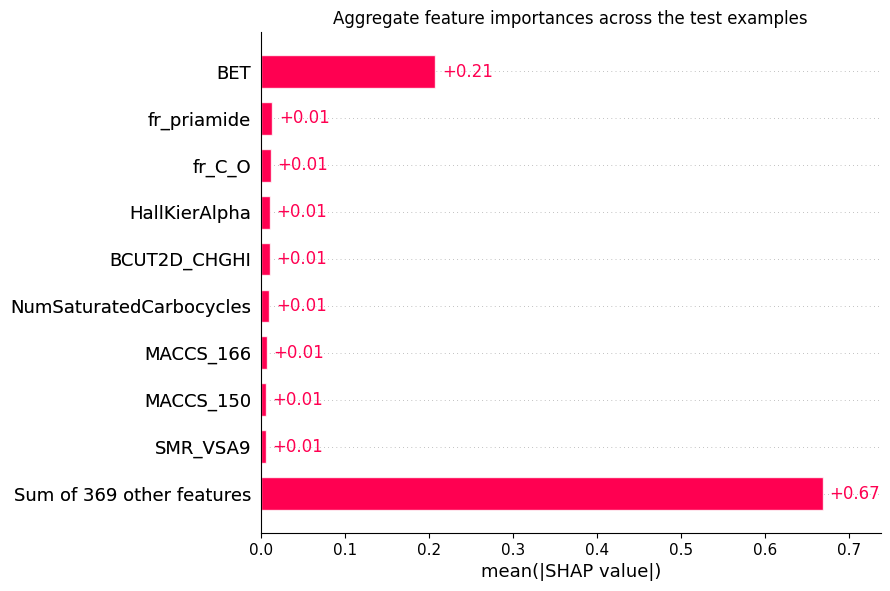

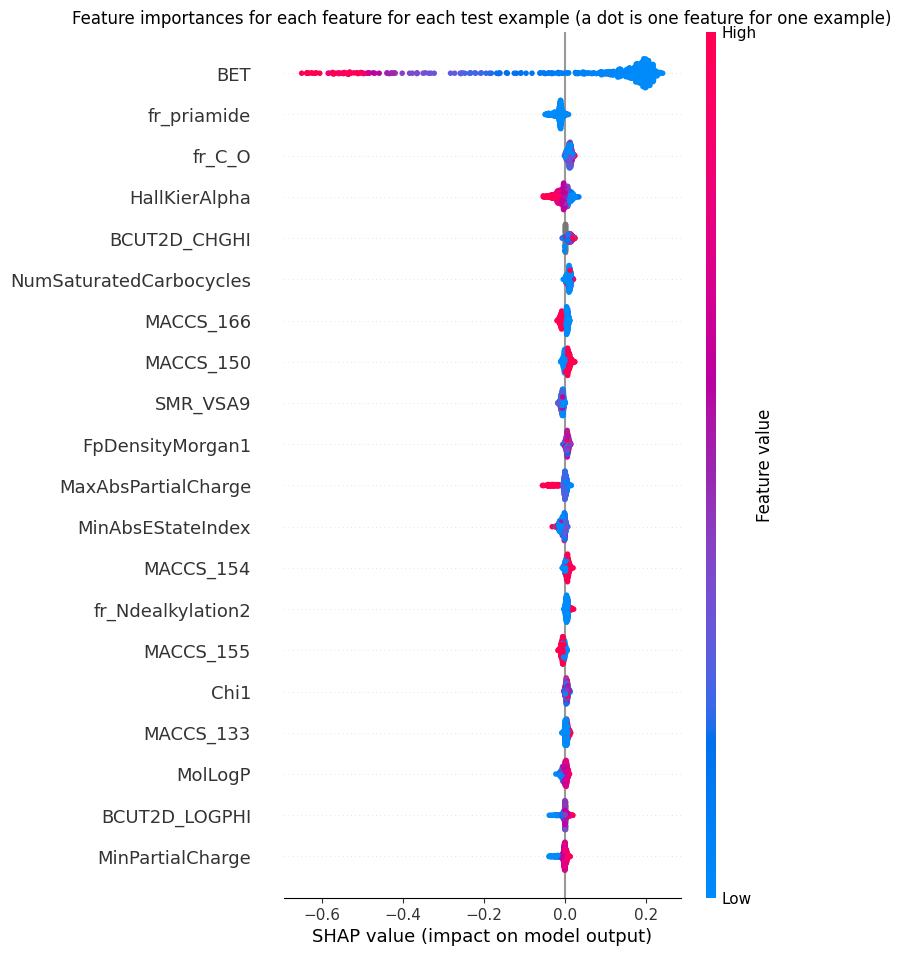

AttributeError: 'NoneType' object has no attribute 'savefig'

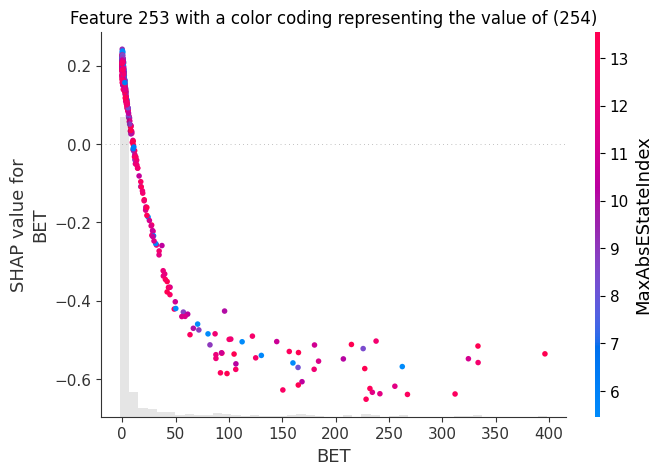

In [ ]:
# ========================
# 1. 导入库
# ========================
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from tabpfn import TabPFNClassifier
from tabpfn_extensions import interpretability
import warnings
warnings.filterwarnings("ignore")  

# ========================
# 2. 配置
# ========================
DATA_PATH = "/content/drive/MyDrive/classification_input_binary_with_original.csv" 
OUTPUT_PATH = "/content/drive/MyDrive/shap_values_tabpfn_binary.pkl"
SUMMARY_PLOT = "/content/drive/MyDrive/shap_summary_binary.png"

# ========================
# 3. 加载数据
# ========================
data = pd.read_csv(DATA_PATH)

# ⚠️ 修改这里：假设第0列是标签，3列之后是特征
X = data.iloc[:, 3:]   # 特征
y = data.iloc[:, 0]    # 标签
feature_names = X.columns

print("数据维度:", X.shape)
print("类别分布:")
print(y.value_counts())

# ========================
# 4. 训练 TabPFN 二分类模型
# ========================
model = TabPFNClassifier(device="cuda")   # Colab GPU 可用
model.fit(X, y)

# ========================
# 5. 计算 SHAP 值
# ========================
shap_values = interpretability.shap.get_shap_values(
    estimator=model,
    test_x=X,
    attribute_names=feature_names,
    algorithm="permutation",
    max_evals=max(600, 2 * X.shape[1] + 1)
)

# 保存 shap values
joblib.dump(shap_values, OUTPUT_PATH)
print(f"✅ SHAP values 已保存: {OUTPUT_PATH}")

# ========================
# 6. 绘制 Bee Swarm 图
# ========================
fig = interpretability.shap.plot_shap(shap_values)
fig.savefig(SUMMARY_PLOT, dpi=300, bbox_inches="tight")
plt.close()
print(f"✅ Bee swarm 图已保存: {SUMMARY_PLOT}")
